<a href="https://colab.research.google.com/github/bhojaram/TheSparkFoundation/blob/main/Supervised_ML(Task_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP - The Spark Foundation

# Data Science & Business Analytics Intern
# Author: Bhojaram SA
# Task 1: Prediction using Supervised ML

#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading the dataset and creating a data frame

df=pd.read_csv("D:\\Internship\\TheSparkFoundation\\dataset.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory Data Analysis (EDA)

In [ ]:
df.shape

(25, 2)

In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

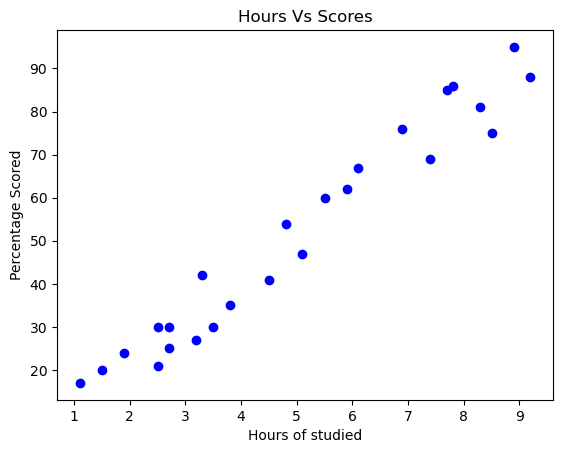

In [ ]:
plt.scatter(df['Hours'], df['Scores'], color='Blue',marker='o')
plt.title("Hours Vs Scores")
plt.xlabel("Hours of studied")
plt.ylabel("Percentage Scored")
plt.show()

**From the graph above, we can see that there is a positive linear relationship between the number of hours studied and the scores obtained. We can say that with the increase of Hours studied(x), there is an increase in the scores obtained(y).**

# correlation matrix & Heatmap

Correlation Matrix:
           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


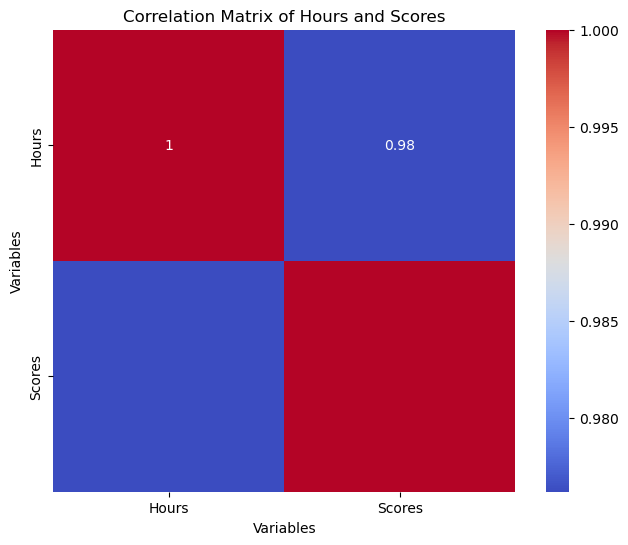

In [ ]:
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)

# Set labels
plt.title('Correlation Matrix of Hours and Scores')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the plot
plt.show()








# Dividing the dataset into dependent(y) and independent(X) features

In [ ]:
#X is independent feature and y is dependent feature

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Splitting the dataset into training and test set

In [ ]:
#Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Scaling the dataset

In [ ]:
#Initialize the StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Appling Linear Regression Model to dataset

In [ ]:
#Initialize the Linear Regression model

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Fit the model on the training data
regressor.fit(X_train, y_train)

LinearRegression()

# predict on test dataset

In [ ]:
#Make predictions on the testing data
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

# actual vs model prediction

In [ ]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


# visualization of linear regression model on test dataset

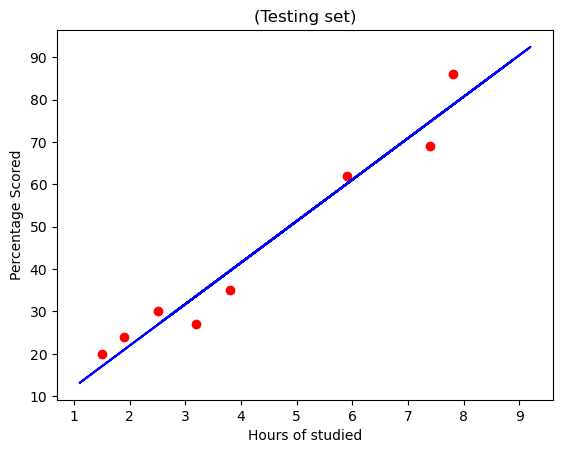

In [ ]:
#plotting the regression line

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('(Testing set)')
plt.xlabel('Hours of studied')
plt.ylabel('Percentage Scored')
plt.show()

# score prediction of our model if a student studies 9.25hrs/day

In [ ]:
Hours = np.array([[9.25]])
predict=regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(predict[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


# model accuracy

In [ ]:
print("Train : ",regressor.score(X_train,y_train)*100)
print("Test : ",regressor.score(X_test,y_test)*100)

Train :  94.84997422695115
Test :  95.68211104435257


# MAE, RSE, MSE of model

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Mean absolute error:', metrics.mean_absolute_error(y_test, regressor.predict(X_test)))
print('r^2 score error:',r2_score(y_test, regressor.predict(X_test)))
print('Mean squared error: ',mean_squared_error(y_test, regressor.predict(X_test)))

Mean absolute error: 4.419727808027652
r^2 score error: 0.9568211104435257
Mean squared error:  22.96509721270043


**Mean Absolute Error: 4.419727808027652  of our model  is a descent score for predicting the result**